In [62]:
import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

In [63]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")
presidi_ospedalieri = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')

In [64]:
presidi_ospedalieri

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


In [65]:
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


1. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid

In [66]:
province['DEN_UTS'] = province['DEN_UTS'].str.upper()

In [67]:
Vac_Pro = pd.merge(province,presidi_ospedalieri,how='inner',left_on=['DEN_UTS'],right_on=['provincia'])
Vac_Pro

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,CHIVASSO,ASL TO 4 OSPEDALE CHIVASSO,ITC,ITC1,1,Piemonte
1,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,CIRIE’,ASL TO 4 OSPEDALE CIRIE’,ITC,ITC1,1,Piemonte
2,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,IVREA,ASL TO 4 OSPEDALE IVREA,ITC,ITC1,1,Piemonte
3,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,MONCALIERI,ASL TO 5 OSPEDALE MONCALIERI,ITC,ITC1,1,Piemonte
4,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,ORBASSANO,AOU SAN LUIGI GONZAGA ORBASSANO,ITC,ITC1,1,Piemonte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2,8,99,0,99,Rimini,-,RIMINI,RN,Provincia,254852.128781,8.658220e+08,"POLYGON ((779573.576 4891555.437, 780189.685 4...",EMR,RIMINI,RIMINI,OSPEDALE RIMINI,ITH,ITH5,8,Emilia-Romagna
247,3,9,100,0,100,Prato,-,PRATO,PO,Provincia,119039.644116,3.658260e+08,"POLYGON ((673895.993 4886075.201, 673938.993 4...",TOS,PRATO,PRATO,OSPEDALE SANTO STEFANO,ITI,ITI1,9,Toscana
248,4,18,101,0,101,Crotone,-,CROTONE,KR,Provincia,255379.678840,1.734212e+09,"POLYGON ((1193301.060 4396651.846, 1193357.426...",CAL,CROTONE,CROTONE,OSPEDALE SPOKE CROTONE,ITF,ITF6,18,Calabria
249,4,18,102,0,102,Vibo Valentia,-,VIBO VALENTIA,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272...",CAL,VIBO VALENTIA,VIBO VALENTIA,OSPEDALE SPOKE VIBO VALENTIA,ITF,ITF6,18,Calabria


In [68]:
Centri_Vaccinali = Vac_Pro.groupby('DEN_UTS').count().reset_index()[['DEN_UTS','presidio_ospedaliero']]
Centri_Vaccinali

,DEN_UTS,presidio_ospedaliero
0,AGRIGENTO,5
1,ALESSANDRIA,4
2,ANCONA,2
3,AOSTA,2
4,AREZZO,1
...,...,...
86,VERCELLI,2
87,VERONA,1
88,VIBO VALENTIA,1
89,VICENZA,1


In [69]:
Centri_Vaccinali_1 = pd.merge(province,Centri_Vaccinali,how='inner',on=['DEN_UTS'])
Centri_Vaccinali_1

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,presidio_ospedaliero
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",10
1,1,1,2,0,2,Vercelli,-,VERCELLI,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5...",2
2,1,1,3,0,3,Novara,-,NOVARA,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5...",3
3,1,1,4,0,4,Cuneo,-,CUNEO,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",4
4,1,1,5,0,5,Asti,-,ASTI,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2,8,99,0,99,Rimini,-,RIMINI,RN,Provincia,254852.128781,8.658220e+08,"POLYGON ((779573.576 4891555.437, 780189.685 4...",1
87,3,9,100,0,100,Prato,-,PRATO,PO,Provincia,119039.644116,3.658260e+08,"POLYGON ((673895.993 4886075.201, 673938.993 4...",1
88,4,18,101,0,101,Crotone,-,CROTONE,KR,Provincia,255379.678840,1.734212e+09,"POLYGON ((1193301.060 4396651.846, 1193357.426...",1
89,4,18,102,0,102,Vibo Valentia,-,VIBO VALENTIA,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272...",1


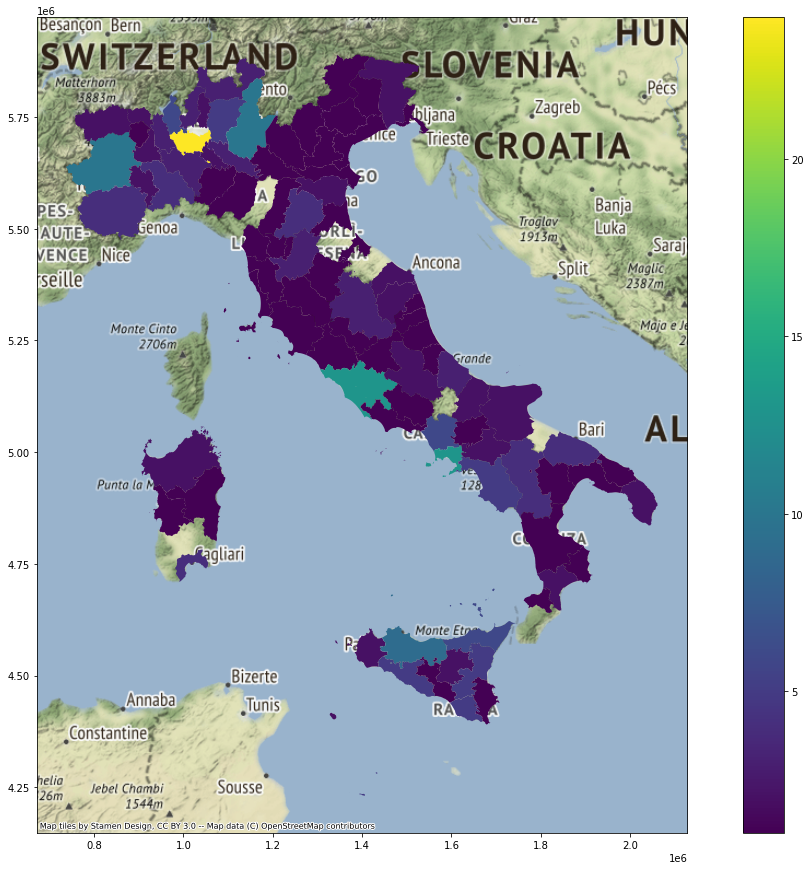

In [70]:
ax = Centri_Vaccinali_1.to_crs(epsg=3857).plot(figsize= (20,15),column='presidio_ospedaliero', legend=True )
ctx.add_basemap(ax)

2. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione

In [71]:
sogg_guariti = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv')
popolazione = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')

In [72]:
popolazione


,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


In [90]:
popolazione_1 = popolazione.groupby('nome_area')['totale_popolazione'].sum().reset_index()
popolazione_1

,nome_area,totale_popolazione
0,Abruzzo,1265353
1,Basilicata,524588
2,Calabria,1803821
3,Campania,5484138
4,Emilia-Romagna,4298305
5,Friuli-Venezia Giulia,1162352
6,Lazio,5528280
7,Liguria,1479768
8,Lombardia,9898997
9,Marche,1456240


In [74]:
sogg_guariti_1 = sogg_guariti.groupby('nome_area')['totale_guariti'].sum().reset_index()

In [75]:
reg_sogg_gua = pd.merge(popolazione_1,sogg_guariti_1,how='inner',on=['nome_area'])
reg_sogg_gua 

,nome_area,totale_popolazione,totale_guariti
0,Abruzzo,1265353,32274
1,Basilicata,524588,9446
2,Calabria,1803821,37021
3,Campania,5484138,180294
4,Emilia-Romagna,4298305,189744
5,Friuli-Venezia Giulia,1162352,64525
6,Lazio,5528280,172892
7,Liguria,1479768,57952
8,Lombardia,9898997,306057
9,Marche,1456240,64393


In [76]:
reg_sogg_gua['percentuale']= reg_sogg_gua['totale_guariti']/reg_sogg_gua['totale_popolazione']*100
reg_sogg_gua

,nome_area,totale_popolazione,totale_guariti,percentuale
0,Abruzzo,1265353,32274,2.550593
1,Basilicata,524588,9446,1.800651
2,Calabria,1803821,37021,2.052366
3,Campania,5484138,180294,3.287554
4,Emilia-Romagna,4298305,189744,4.414391
5,Friuli-Venezia Giulia,1162352,64525,5.551244
6,Lazio,5528280,172892,3.127410
7,Liguria,1479768,57952,3.916290
8,Lombardia,9898997,306057,3.091798
9,Marche,1456240,64393,4.421867


In [84]:
reg_sogg_gua_1 = pd.merge(regioni,reg_sogg_gua,how='inner',left_on=['DEN_REG'], right_on=['nome_area'])
reg_sogg_gua_1

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,totale_popolazione,totale_guariti,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,4175308,168814,4.043151
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5...",Valle d'Aosta,117843,5647,4.791969
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,9898997,306057,3.091798
3,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,4684141,237707,5.074719
4,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",Friuli Venezia Giulia,1162352,64525,5.551244
5,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1479768,57952,3.916290
6,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,4298305,189744,4.414391
7,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3579722,122870,3.432389
8,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,839373,24392,2.905979
9,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1456240,64393,4.421867


In [78]:
regioni['DEN_REG']

0                  Piemonte
1             Valle d'Aosta
2                 Lombardia
3       Trentino-Alto Adige
4                    Veneto
5     Friuli Venezia Giulia
6                   Liguria
7            Emilia-Romagna
8                   Toscana
9                    Umbria
10                   Marche
11                    Lazio
12                  Abruzzo
13                   Molise
14                 Campania
15                   Puglia
16               Basilicata
17                 Calabria
18                  Sicilia
19                 Sardegna
Name: DEN_REG, dtype: object

In [79]:
reg_sogg_gua['nome_area'] = reg_sogg_gua['nome_area'].replace({'Friuli-Venezia Giulia' : 'Friuli Venezia Giulia'})
reg_sogg_gua['nome_area']

0                   Abruzzo
1                Basilicata
2                  Calabria
3                  Campania
4            Emilia-Romagna
5     Friuli Venezia Giulia
6                     Lazio
7                   Liguria
8                 Lombardia
9                    Marche
10                   Molise
11             P.A. Bolzano
12              P.A. Trento
13                 Piemonte
14                   Puglia
15                 Sardegna
16                  Sicilia
17                  Toscana
18                   Umbria
19            Valle d'Aosta
20                   Veneto
Name: nome_area, dtype: object

In [80]:
#reg_sogg_gua['nome_area'] = reg_sogg_gua['nome_area'].replace({'P.A. Trento' : 'Trentino-Alto Adige'})
#reg_sogg_gua['nome_area']

In [81]:
#reg_sogg_gua = reg_sogg_gua.drop(reg_sogg_gua.index[reg_sogg_gua["nome_area"] == "P.A. Bolzano"])
#reg_sogg_gua['nome_area']

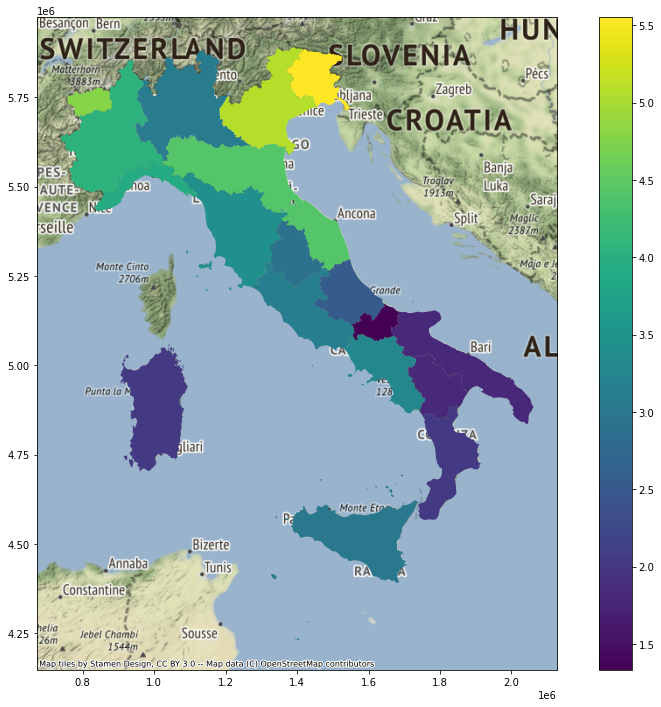

In [85]:
#reg_sogg_gua_1
ax = reg_sogg_gua_1.to_crs(epsg=3857).plot(figsize= (15,12),column='percentuale', legend=True )
ctx.add_basemap(ax)

3. una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se la percentuale di vaccinati è superiore alla media

In [86]:
prima_vacc = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
prima_vacc

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187117,2022-02-14,Pfizer/BioNTech,VEN,50-59,378,285,70,221,11,361,ITH,ITH3,5,Veneto
187118,2022-02-14,Pfizer/BioNTech,VEN,60-69,208,179,38,171,2,176,ITH,ITH3,5,Veneto
187119,2022-02-14,Pfizer/BioNTech,VEN,70-79,91,111,9,78,1,114,ITH,ITH3,5,Veneto
187120,2022-02-14,Pfizer/BioNTech,VEN,80-89,27,79,6,37,0,63,ITH,ITH3,5,Veneto


In [88]:
prima_vacc_1 = prima_vacc.groupby('nome_area')['prima_dose'].sum().reset_index()
prima_vacc_1

,nome_area,prima_dose
0,Abruzzo,1046348
1,Basilicata,453935
2,Calabria,1510718
3,Campania,4528492
4,Emilia-Romagna,3647682
5,Friuli-Venezia Giulia,961656
6,Lazio,4832987
7,Liguria,1252625
8,Lombardia,8398142
9,Marche,1187118


In [89]:
vacc_prima_dose = pd.merge(regioni,prima_vacc_1,how='inner',left_on=['DEN_REG'], right_on=['nome_area'])
vacc_prima_dose

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348


In [91]:
vacc_prima_dose_pop = pd.merge(vacc_prima_dose,popolazione_1,how='inner',on=['nome_area'])
vacc_prima_dose_pop

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353


In [94]:
vacc_prima_dose_pop['percentuale']= vacc_prima_dose_pop['prima_dose']/vacc_prima_dose_pop['totale_popolazione']*100
vacc_prima_dose_pop

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182


In [95]:
media = vacc_prima_dose_pop['percentuale'].mean()
media

84.64479574343098

In [96]:
min_media = vacc_prima_dose_pop[vacc_prima_dose_pop['percentuale'] < media]
min_media

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182
11,4,15,Campania,8.881667e+05,1.366325e+10,"MULTIPOLYGON (((1037313.692 4449410.367, 10373...",Campania,4528492,5484138,82.574363
14,4,18,Calabria,8.378109e+05,1.521607e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833...",Calabria,1510718,1803821,83.750993
15,5,19,Sicilia,1.334638e+06,2.582376e+10,"MULTIPOLYGON (((822886.611 3935355.889, 822871...",Sicilia,3834663,4665412,82.193448


In [97]:
mag_media = vacc_prima_dose_pop[vacc_prima_dose_pop['percentuale'] > media]
mag_media

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
10,4,14,Molise,4.338181e+05,4.461183e+09,"POLYGON ((984002.800 4670714.415, 985067.040 4...",Molise,250950,288826,86.886222
12,4,16,Puglia,1.175757e+06,1.953616e+10,"MULTIPOLYGON (((1280636.111 4454459.746, 12806...",Puglia,3325820,3819923,87.065106
13,4,17,Basilicata,6.142055e+05,1.007274e+10,"MULTIPOLYGON (((1073707.061 4445700.106, 10737...",Basilicata,453935,524588,86.531716
16,5,20,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823...",Sardegna,1341630,1568672,85.526484


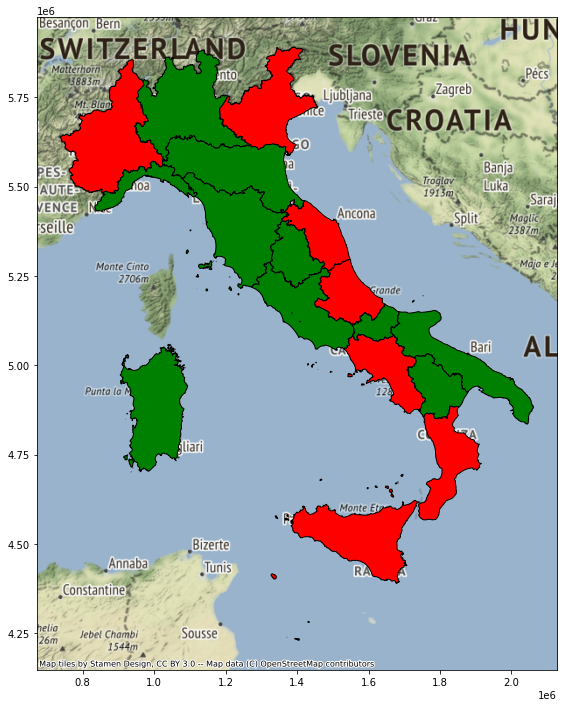

In [99]:
ax = min_media.to_crs(epsg=3857).plot(figsize= (15,12), facecolor='r', edgecolor='k' )
mag_media.to_crs(epsg=3857).plot(facecolor='g', ax=ax, edgecolor='k')
ctx.add_basemap(ax)